# Bhutan Rainfall Forecasting using Prophet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import os


In [2]:
# Load cleaned dataset (national level)
df = pd.read_csv("../data/cleaned_btn_rainfall.csv", parse_dates=["date"])

In [3]:
# Step 1: Aggregate daily rainfall to national monthly average
monthly_rainfall = df.groupby(df["date"].dt.to_period("M"))["rfh"].mean().reset_index()
monthly_rainfall["date"] = monthly_rainfall["date"].dt.to_timestamp()

In [4]:
# Step 2: Format for Prophet
df_prophet = monthly_rainfall.rename(columns={"date": "ds", "rfh": "y"})

In [5]:
# Step 3: Initialize and train Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)
model.fit(df_prophet)

16:41:01 - cmdstanpy - INFO - Chain [1] start processing
16:41:02 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Step 4: Create future dataframe for 12 months
future = model.make_future_dataframe(periods=12, freq='M')

c:\Users\sanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [7]:
# Step 5: Forecast
forecast = model.predict(future)

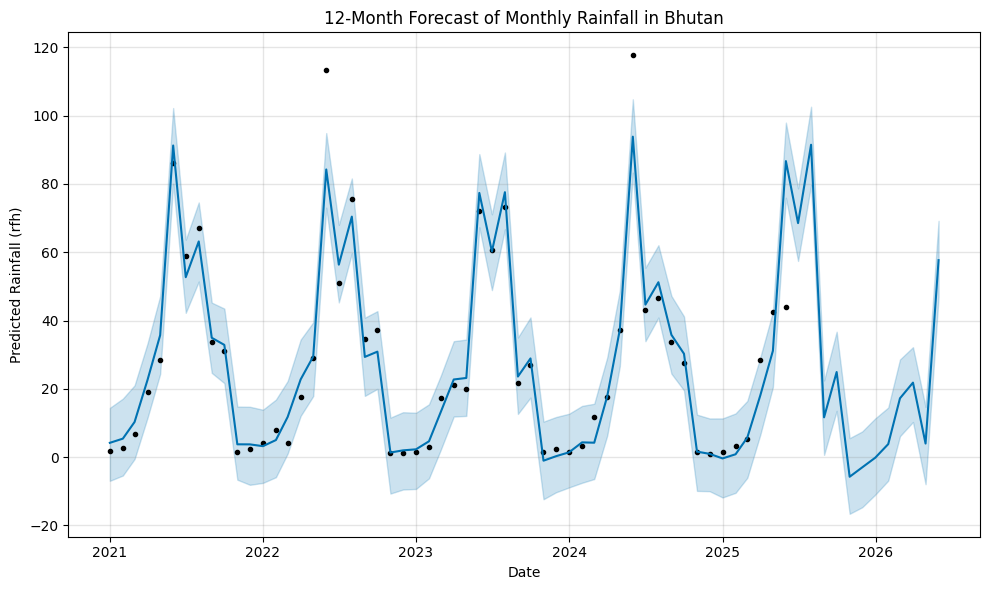

In [8]:
# Step 6: Plot forecast
fig1 = model.plot(forecast)
plt.title("12-Month Forecast of Monthly Rainfall in Bhutan")
plt.xlabel("Date")
plt.ylabel("Predicted Rainfall (rfh)")
plt.tight_layout()
plt.savefig("../visuals/rainfall_forecast_prophet.png")
plt.show()

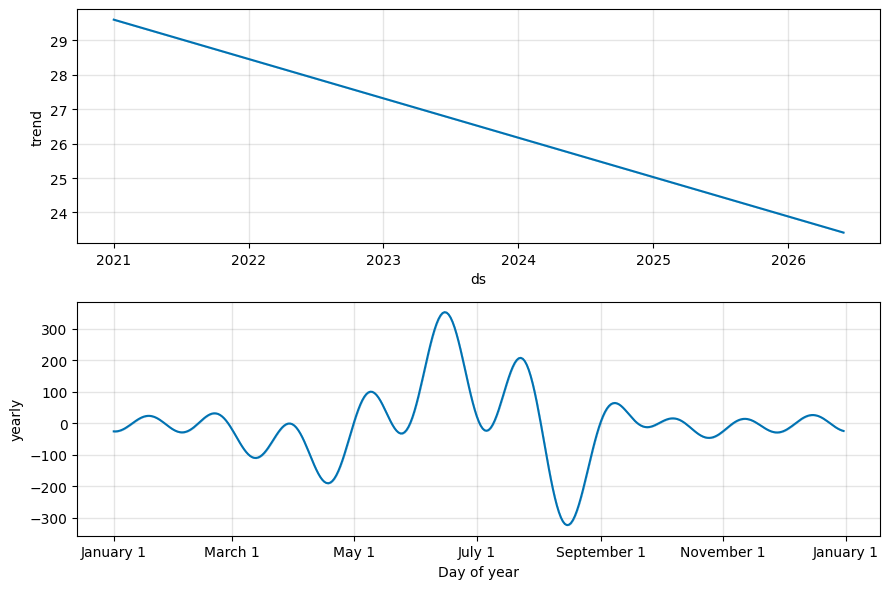

In [9]:
# Step 7: Plot forecast components
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.savefig("../visuals/forecast_components_prophet.png")
plt.show()


In [10]:
# Step 8: Save forecasted values
forecast_result = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
forecast_result.to_csv("../outputs/forecast.csv", index=False)

print("\n✅ Forecast saved to '../outputs/forecast.csv'")



✅ Forecast saved to '../outputs/forecast.csv'
